In [1]:
!pip install pandas yfinance prophet


     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.1/3.0 MB ? eta -:--:--
     - -------------------------------------- 0.1/3.0 MB 1.8 MB/s eta 0:00:02
     -- ------------------------------------- 0.2/3.0 MB 1.8 MB/s eta 0:00:02
     --- ------------------------------------ 0.3/3.0 MB 1.6 MB/s eta 0:00:02
     ---- ----------------------------------- 0.3/3.0 MB 1.7 MB/s eta 0:00:02
     ---- ----------------------------------- 0.4/3.0 MB 1.4 MB/s eta 0:00:02
     ----- ---------------------------------- 0.4/3.0 MB 1.2 MB/s eta 0:00:03
     ----- ---------------------------------- 0.4/3.0 MB 1.3 MB/s eta 0:00:02
     ------ --------------------------------- 0.5/3.0 MB 1.2 MB/s eta 0:00:03
     ------ --------------------------------- 0.5/3.0 MB 1.1 MB/s eta 0:00:03
     ------- -------------------------------- 0.6/3.0 MB 1.1 MB/s eta 0:00:03
     -------- ------------------------------- 0.6/3.0 MB 1.1 MB/s eta 0:00:03


In [15]:
import pandas as pd
import yfinance as yf
from prophet import Prophet
import matplotlib.pyplot as plt


In [17]:
stock_symbol = 'AAPL'
start_date = '2015-01-01'
end_date = '2024-01-01'

data = yf.download(stock_symbol, start=start_date, end=end_date)
data.reset_index(inplace=True)
data.head() 


[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.373955,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.687304,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.689537,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.021711,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,24.944687,237458000


In [19]:
data['Date'] = pd.to_datetime(data['Date'])  
data = data[['Date', 'Close']]  
data.columns = ['ds', 'y'] 


In [21]:
model = Prophet()
model.fit(data)


21:19:16 - cmdstanpy - INFO - Chain [1] start processing
21:19:17 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)


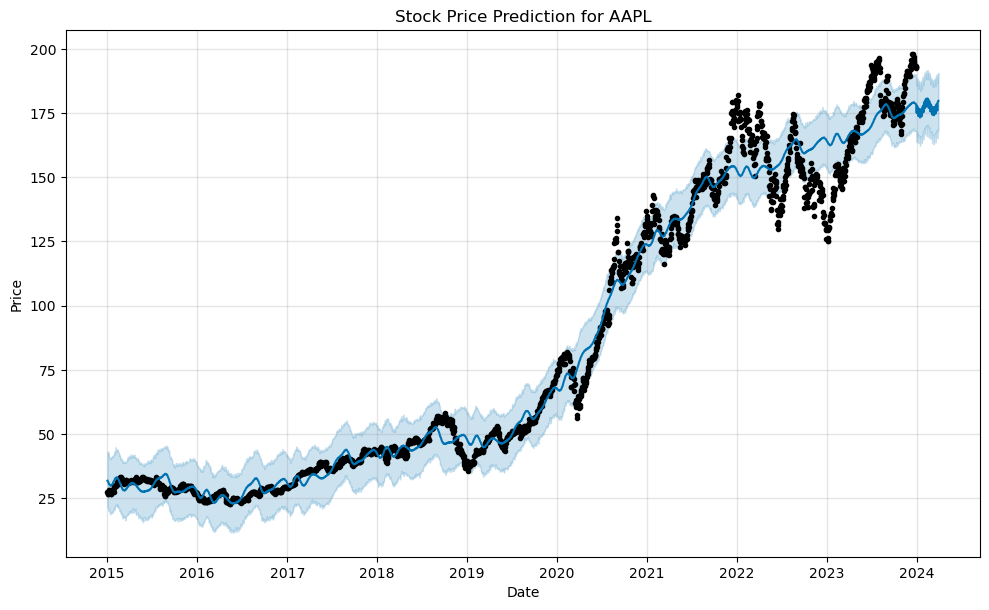

In [25]:
fig = model.plot(forecast)
plt.title(f"Stock Price Prediction for {stock_symbol}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()
